Bitte zuerst den Abschnitt "Kartendarstellung mit Python" lesen.

# Kartendarstellung in R mit mapplots

In R gibt es zahlreiche Pakete, die Visualisierungen von Daten im Zusammenspiel mit Karten ermöglichen. Leider hat sich bei der Recherche ergeben, dass viele davon nicht oder zumindest nicht zufriedenstellend mit dem Jupyter-Notebook zusammenspielen. Darunter auch einige Pakete, welche die im Python-Teil verwendete JavaScript-Bibliothek `leaflet` zur Kartendarstellung nutzen. Hier ein Überblick (Stand Juni 2017 - Jupyter Notebook 5.0, irkernel 0.7.1): 

|Paket|Beschreibung|
|:--|:-------------------------------|
|leafletR|Kartendarstellung fehlerhaft|
| rleafmap |Kartendarstellung nicht inline, ansonsten aber sehr empfehlenswert (vergleichbar mit ipyleaflet)|
| leaflet |keine Kartendarstellung im Notebook|
| ggmap |keine inline Ausgabe der Maps, api-key Probleme im Zusammenspiel mit Google Maps|
|OpensStreetMap|funktioniert, allerdings reine Kartendarstellung, Visualiesierung von Daten muss recht aufwändig über andere Pakete realisiert werden|
|maps|recht beschränkte Funktionalität, aber für einfache Visualisierungen durchaus empfehlenswert|

Eine der wenigen Bibliothen, die gut innerhalb des Jupyter-Notebooks laufen, ist `mapplots`. Die graphische Ausgabe ist zwar nicht ganz so ansprechend wie die der `leaflet`-basierten Bibliotheken, aber dafür lassen die Visualisierungsmöglichkeiten von Daten innerhalb der Karten kaum Wünsche offen. <br>
Da das Paket nicht in den r-essentials, welche jupyter standardmäßig mitbringt, enthalten ist, muss es zunächst installiert werden.

Der Pfad im `install.packages()` Befehl muss natürlich ensprechend eurer Umgebung angepasst werden.

In [1]:
options(repos = c('http://cran.us.r-project.org'))
install.packages("mapplots")

package 'mapplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alex\AppData\Local\Temp\RtmpQNanM4\downloaded_packages


Nach der Installation können wir die Bibliothek importieren:

In [3]:
library(mapplots)

Des weiteren benötigen wir zur Verwendung des oben vorgestellten Formates shapefiles eine entsprechende Bibliothek. Auch diese muss aus externen Quellen installiert werden:

In [4]:
options(repos = c('http://cran.us.r-project.org'))
install.packages("shapefiles")

package 'shapefiles' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Alex\AppData\Local\Temp\RtmpQNanM4\downloaded_packages


In [6]:
library(shapefiles)

Sofern man sich in der Ordnerstuktur des Repositorys bewegt, können die folgenden Beispiele so übernommen werden. Anderenfalls muss jeweils der Pfad-Parameter angepasst werden. Dies gilt auch für die später folgenden Beispiele in `python`. 

Als erstes lesen wir ein Shapefile von Deutschland mit den Bundesländer-Grenzen ein. Die einzelnen Dateien des Shapefiles haben den gleichen Dateinamen. Dieser Dateiname muss (ohne irgendeine Dateinamenserweiterung) bei der Zuweisung angegeben werden. <br>
Im vorliegenden Beispiel liegen im Ordner Bundesländer die Shapefiles:
- Bundeslaender.dbf
- Bundeslaender.shp
- Bundeslaender.shx

>Quelle: https://www.zensus2011.de/DE/Infothek/Begleitmaterial_Ergebnisse/Begleitmaterial_node.html
Shapefile der Verwaltungsgrenzen (WGS84)

In [7]:
cpath = getwd()

In [8]:
shp.file <- file.path(cpath,"../daten/Kartendarstellung/Bundeslaender/Bundeslaender")
germany <- read.shapefile(shp.file)

Nun lassen wir das oben eingelesen Shapefile auf unserer Map ausgeben.
- `basemap()` erstellt die Karte
- die Parameter (hier: `xlim` und `ylim`) bestimmen den darzustellenden Bereich
- `draw.shape` zeichenet unser Shapefile auf die Karte

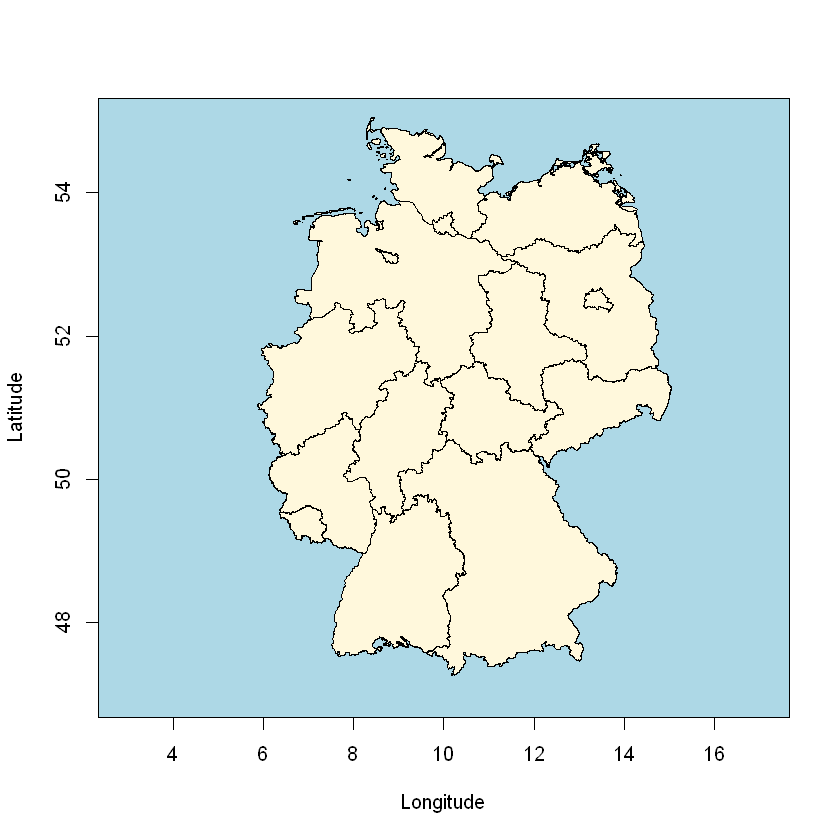

In [9]:
ylim <- c(47,55)
xlim <- c(5,15)
basemap(xlim, ylim)
draw.shape(germany,col="cornsilk")

Nun lesen wir nach dem gleichen Schema ein Shapefile mit den Standorten aller deutschen Hochschulen ein.

> Quelle: http://opendata-esri-de.opendata.arcgis.com/datasets/osm-de-hochschulen

In [10]:
shp.file <- file.path(cpath,"../daten/Kartendarstellung/DE_Hochschulen/DE_Hochschulen")
de_hs <- read.shapefile(shp.file)

Nun lassen wir beide Shapefiles in einer Karte darstellen. Wir müssen zuerst die Deutschlandkarte mit den Bundesländern zeichnen lassen und dann die Hochschulen, da diese sonst überdeckt würden. <br>
> **Wichtig**: Hier wird beim Zeichnen der Hochschulen in `draw.shape()` noch ein zusätzlicher Parameter `type` mitgegeben. Dieser ist nötig, da es sich um einzelne Ortspunkte handelt. Standardmäßig geht `mapplots` davon aus, dass hier Polygone (wie im Falle der Deutschlandkarte) eingelesen werden.

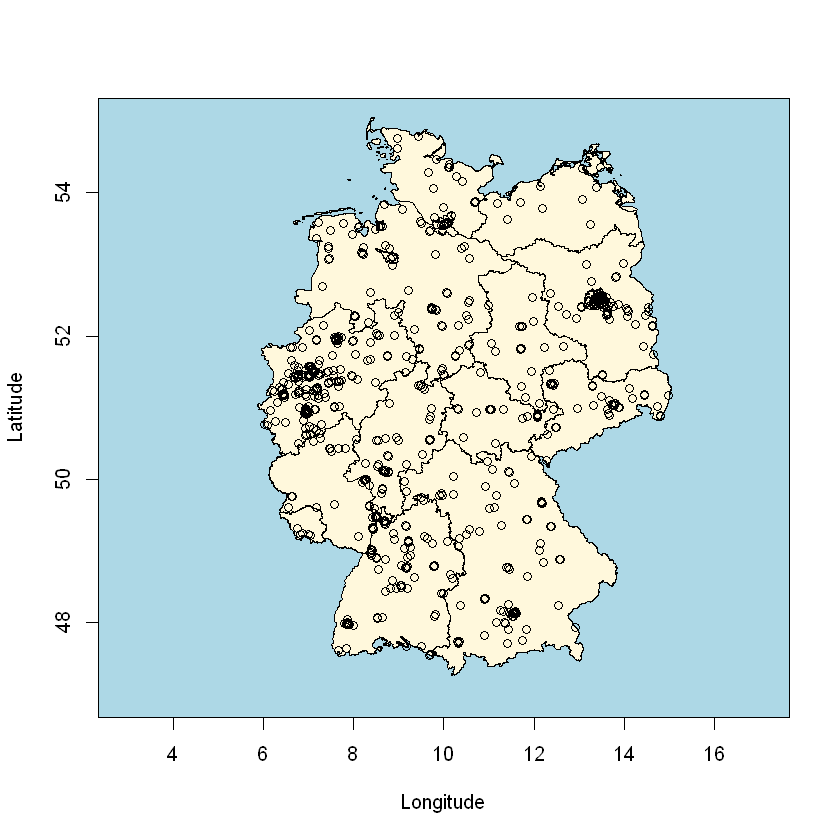

In [11]:
ylim <- c(47,55)
xlim <- c(5,15)
basemap(xlim, ylim)
draw.shape(germany,col="cornsilk")
draw.shape(de_hs, type="p")

Im nächsten Beispiel werden die zu visualisierenden Daten im CSV-Format eingelesen. Es handelt sich um einen Datensatz mit Erdbeben der letzten zehn Jahre in Deutschland und um Deutschland herum mit Magnitude 1 und stärker. Wer aktuelle Daten verwenden möchte, findet diese hier:  
> https://earthquake.usgs.gov/earthquakes/search/. <br>
Einfach unter der Rubrik "Output Options" CSV wählen. 

Die hier verwendeten Daten stammen vom 02. Juni 2017.

In [12]:
eq <- read.csv("../daten/Kartendarstellung/erdbeben_deutschland.csv", header = TRUE, sep = ",", dec = ".")

In [13]:
eq[0:4,]

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2015-04-16T06:38:08.790Z,51.4400,12.1290,20.6,3.3,ml,NA,NA,NA,1.00,...,2015-06-26T23:15:53.040Z,"1km NE of Grobers, Germany",earthquake,7.8,9.3,NA,NA,reviewed,bgrd,bgrd
2014-05-31T10:37:20.310Z,50.1965,12.4098,10.0,3.8,mwr,NA,44,0.918,0.68,...,2015-01-29T03:09:17.453Z,"4km NE of Skalna, Czech Republic",earthquake,NA,1.9,0.063,24,reviewed,us,us
2014-05-17T16:46:27.000Z,49.7934,8.6319,10.0,3.6,mwr,NA,56,1.478,1.38,...,2015-01-30T03:36:50.700Z,"2km SE of Pfungstadt, Germany",earthquake,NA,1.6,0.073,18,reviewed,us,us
2013-08-09T10:44:08.000Z,47.2420,11.4730,6.4,3.7,ml,NA,NA,NA,1.65,...,2015-01-31T00:00:03.921Z,"1km ENE of Sistrans, Austria",earthquake,NA,6.8,NA,NA,reviewed,us_rom,us_zamg


Die Funktion `draw.bubble` liest nun die Positionen aus unserem Datensatz. 

- Die Größe des Kreises wird bestimmt durch die Magnitude (Spalte `mag` des Dataframes). 
> Ohne den Parameter `pch` wird übrigens der Kreis nicht mit der übergebenen Farbe gefüllt. Zusätzlich sind hiermit auch noch andere Formen möglich. Der Wert 22 liefert beispielsweise Quadrate. <br>

- Auch eine Legende lässt sich mit einer entsprechenden Funktion erstellen. Die meisten Parameter hierzu sind selbstsprechend. 
- Mit `z` geben wir den größten darzustellenden Wert für unsere Legnde an und txt.cex steht für die Schriftgröße innerhalb der Legende.

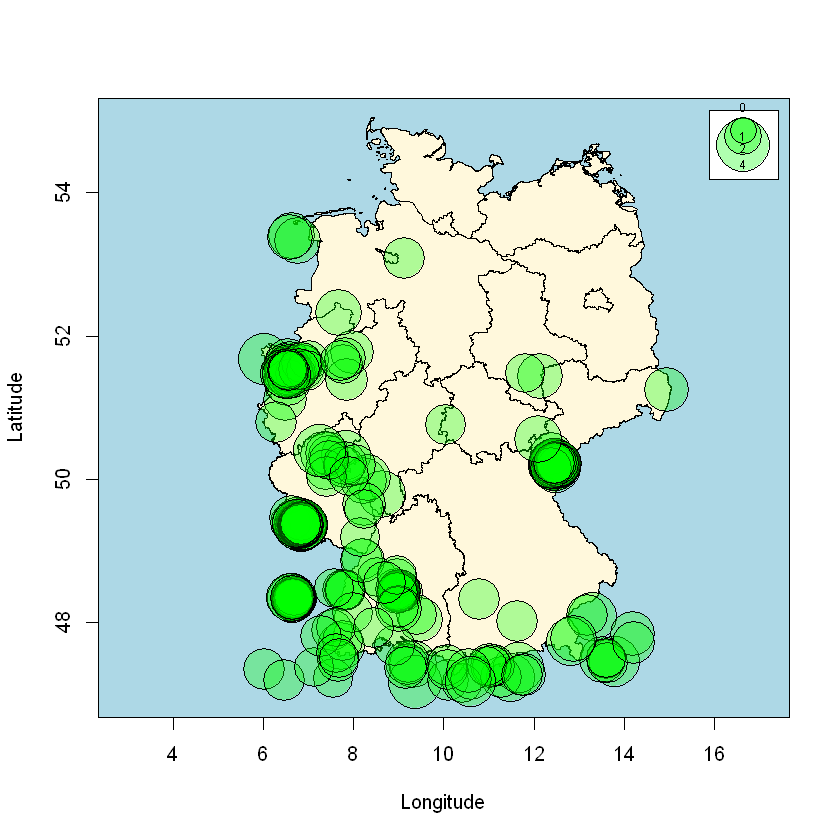

In [14]:
basemap(xlim, ylim)
draw.shape(germany, col="cornsilk")
draw.bubble(eq$longitude, eq$latitude, eq$mag, maxradius=0.4, pch=21, bg="#00FF0050")
legend.z <- round(max(eq$mag))
legend.bubble("topright", z=legend.z, maxradius=0.4, n=4, inset=0.02, bg="white", txt.cex=0.6,
pch=21, pt.bg="#00FF0050")


Folgendes Beispiel entstammt der Dokumentation der Bibliothek mapplots 
> Quelle: https://cran.r-project.org/web/packages/mapplots/mapplots.pdf 

Es verwendet mit der Bibliothek gelieferten Beispieldatensatz zum Fischfang vor Irland. Hier ein kleiner Auszug aus dem Datensatz. 

In [15]:
data(landings)
data(coast)
landings[0:4,]

Longitude,Latitude,Species,LiveWeight
-6.5,49.75,Cod,80
-9.5,50.75,Cod,15306
-8.5,50.75,Cod,35387
-8.5,51.75,Cod,18642


Die Umsetzung der Visualisierung entspricht in weiten Teilen dem obigen Beispiel zu den Erdbeben. Kreise visualisieren hier das Gewicht der gefangenen Fische in einem bestimmten Seeregion. Hier wird als zusätzliche Datendimension nach den gefangenen Arten klassifiziert und die Anteile in Form eines Tortendiagrammes dargestellt.

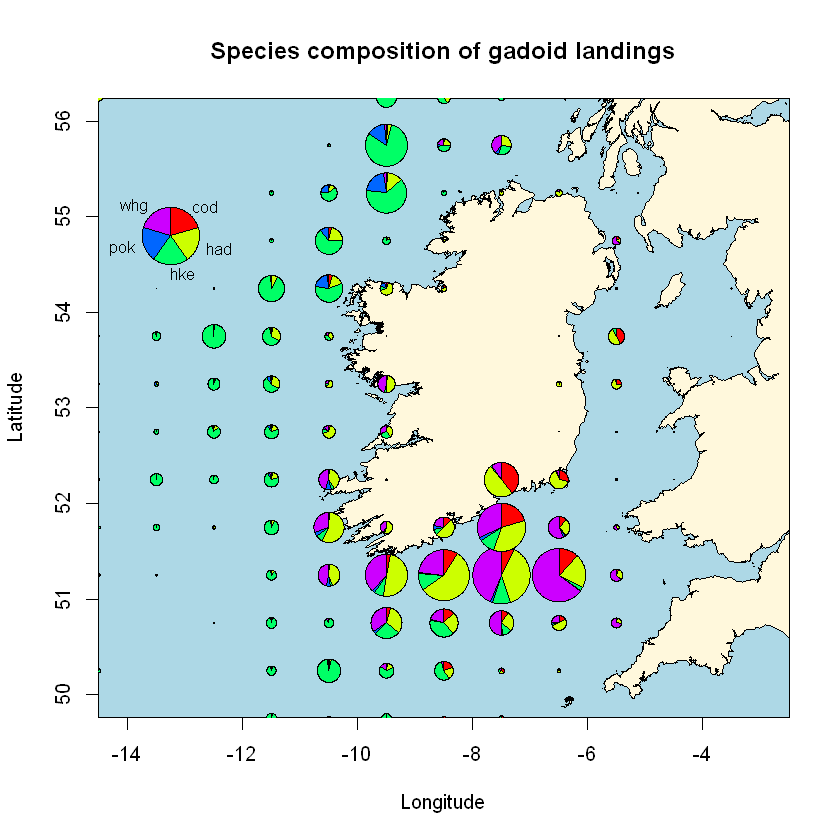

In [16]:
xlim <- c(-12,-5)
ylim <- c(50,56)
xyz <- make.xyz(landings$Lon,landings$Lat,landings$LiveWeight,landings$Species)
col <- rainbow(5)
basemap(xlim, ylim, main = "Species composition of gadoid landings")
draw.shape(coast, col="cornsilk")
draw.pie(xyz$x, xyz$y, xyz$z, radius = 0.3, col=col)
legend.pie(-13.25,54.8,labels=c("cod","had","hke","pok","whg"), radius=0.3, bty="n", col=col,
cex=0.8, label.dist=1.3)

Auch eine Heatmap zu den gefangenen Fischmengen in den Regionen lässt sich recht leicht realisieren:

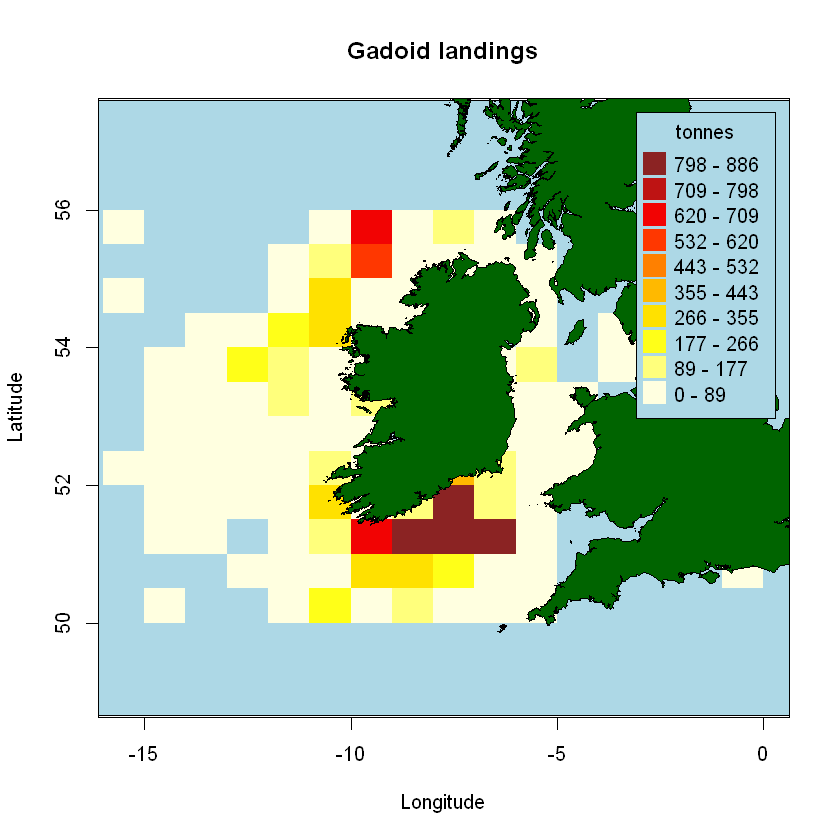

In [17]:
data(coast)
data(landings)
# Größe eines grid-Elementes festlegen:
byx = 1
byy = 0.5
xlim <- c(-15.5,0)
ylim <- c(50.25,56)
# Grid mit den gewünschten Daten erstellen
grd <- make.grid(landings$Lon,landings$Lat,landings$LiveWeight, byx, byy, xlim, ylim)
# Unterteilung des Wertebereiches mit der Funktion breaks.grid
breaks <- breaks.grid(grd,n=10,zero=FALSE)
basemap(xlim, ylim, main = "Gadoid landings")
draw.grid(grd,breaks)
draw.shape(coast, col="darkgreen")
legend.grid("topright", breaks=breaks/1000, type=2, inset=0.02, title="tonnes")